In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_medals.csv
/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_results.pkl
/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_hosts.csv
/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_athletes.csv
/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_results.csv


## How is data look like?

In [2]:
data_hosts_path = '/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_hosts.csv'
data_medals_path = '/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_medals.csv'
data_results_path = '/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_results.csv'
data_athletes_path = '/Users/tuan/Desktop/vinuni-stuff/comp5120-datavis/projects/olympic/data/olympic_athletes.csv'

### Hosts Dataset

In [3]:
df_hosts = pd.read_csv(data_hosts_path)
df_hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [ ]:
# df_hosts.info()
# print game_season "Summer"
print(df_hosts[df_hosts['game_season'] == 'Summer'])

### Medals Dataset

In [7]:
df_medals = pd.read_csv(data_medals_path)
df_medals.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [11]:
df_medals['slug_game'].unique(), len(df_medals['slug_game'].unique())

(array(['beijing-2022', 'tokyo-2020', 'pyeongchang-2018', 'rio-2016',
        'sochi-2014', 'london-2012', 'vancouver-2010', 'beijing-2008',
        'turin-2006', 'athens-2004', 'salt-lake-city-2002', 'sydney-2000',
        'nagano-1998', 'atlanta-1996', 'lillehammer-1994',
        'barcelona-1992', 'albertville-1992', 'seoul-1988', 'calgary-1988',
        'los-angeles-1984', 'sarajevo-1984', 'moscow-1980',
        'lake-placid-1980', 'montreal-1976', 'innsbruck-1976',
        'munich-1972', 'sapporo-1972', 'mexico-city-1968', 'grenoble-1968',
        'tokyo-1964', 'innsbruck-1964', 'rome-1960', 'squaw-valley-1960',
        'melbourne-1956', 'cortina-d-ampezzo-1956', 'helsinki-1952',
        'oslo-1952', 'london-1948', 'st-moritz-1948', 'berlin-1936',
        'garmisch-partenkirchen-1936', 'los-angeles-1932',
        'lake-placid-1932', 'amsterdam-1928', 'st-moritz-1928',
        'paris-1924', 'chamonix-1924', 'antwerp-1920', 'stockholm-1912',
        'london-1908', 'st-louis-1904', 'p

In [12]:
df_medals['discipline_title'].unique(), len(df_medals['discipline_title'].unique())
# filter data: discipline_title: "Swimming", slug_game: "tokyo-2020"
df_medals_swimming_tokyo = df_medals[(df_medals['discipline_title'] == 'Swimming') & (df_medals['slug_game'] == 'tokyo-2020')]

In [13]:
df_medals_swimming_tokyo

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
1265,Swimming,tokyo-2020,Men's 400m Individual Medley,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/brendon-smith,Brendon SMITH,Australia,AU,AUS
1266,Swimming,tokyo-2020,Men's 400m Individual Medley,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/jay-litherland,Jay LITHERLAND,United States of America,US,USA
1267,Swimming,tokyo-2020,Men's 400m Individual Medley,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/chase-kalisz,Chase KALISZ,United States of America,US,USA
1268,Swimming,tokyo-2020,Mixed 4 x 100m Medley Relay,Mixed,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR
1269,Swimming,tokyo-2020,Mixed 4 x 100m Medley Relay,Mixed,SILVER,GameTeam,China,NaN,NaN,People's Republic of China,CN,CHN
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,Swimming,tokyo-2020,Women's 4 x 200m Freestyle Relay,Women,SILVER,GameTeam,United States,NaN,NaN,United States of America,US,USA
1366,Swimming,tokyo-2020,Women's 4 x 200m Freestyle Relay,Women,BRONZE,GameTeam,Australia,NaN,NaN,Australia,AU,AUS
1367,Swimming,tokyo-2020,Women's 4 x 100m Medley Relay,Women,GOLD,GameTeam,Australia,NaN,NaN,Australia,AU,AUS
1368,Swimming,tokyo-2020,Women's 4 x 100m Medley Relay,Women,SILVER,GameTeam,United States,NaN,NaN,United States of America,US,USA


In [17]:
sorted(df_medals_swimming_tokyo['event_title'].unique()), len(df_medals_swimming_tokyo['event_title'].unique())

(["Men's 100m Backstroke",
  "Men's 100m Breaststroke",
  "Men's 100m Butterfly",
  "Men's 100m Freestyle",
  "Men's 1500m Freestyle",
  "Men's 200m Backstroke",
  "Men's 200m Breaststroke",
  "Men's 200m Butterfly",
  "Men's 200m Freestyle",
  "Men's 200m Individual Medley",
  "Men's 4 x 100m Freestyle Relay",
  "Men's 4 x 100m Medley Relay",
  "Men's 4 x 200m Freestyle Relay",
  "Men's 400m Freestyle",
  "Men's 400m Individual Medley",
  "Men's 50m Freestyle",
  "Men's 800m Freestyle",
  'Mixed 4 x 100m Medley Relay',
  "Women's 100m Backstroke",
  "Women's 100m Breaststroke",
  "Women's 100m Butterfly",
  "Women's 100m Freestyle",
  "Women's 1500m Freestyle",
  "Women's 200m Backstroke",
  "Women's 200m Breaststroke",
  "Women's 200m Butterfly",
  "Women's 200m Freestyle",
  "Women's 200m Individual Medley",
  "Women's 4 x 100m Freestyle Relay",
  "Women's 4 x 100m Medley Relay",
  "Women's 4 x 200m Freestyle Relay",
  "Women's 400m Freestyle",
  "Women's 400m Individual Medley",
  

### Results Dataset

In [7]:
df_results = pd.read_csv(data_results_path)
df_results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [8]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

### Athletes Dataset

In [18]:
df_athletes = pd.read_csv(data_athletes_path)
df_athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [85]:
len(df_athletes)

75904

In [60]:
df_medals.shape

(21697, 12)

## Join tables (example: medals)

In [23]:
data = df_medals.merge(df_hosts, how='left', left_on='slug_game', right_on='game_slug')
data['athlete_full_name'] = data['athlete_full_name'].str.title()
# removes join columns
data.drop(['slug_game', 'game_slug'], inplace=True, axis=1)
# removes unused columns
data.drop(['game_end_date', 'game_start_date'], axis=1, inplace=True)
data.shape

(21697, 15)

In [24]:
data.head()

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania Constantini,Italy,IT,ITA,China,Beijing 2022,Winter,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos Mosaner,Italy,IT,ITA,China,Beijing 2022,Winter,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin Skaslien,Norway,NO,NOR,China,Beijing 2022,Winter,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus Nedregotten,Norway,NO,NOR,China,Beijing 2022,Winter,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida De Val,Sweden,SE,SWE,China,Beijing 2022,Winter,2022


In [25]:
# replaces long country names with short analogs
country_dict = {
    'German Democratic Republic (Germany)':'Germany', 
    'Federal Republic of Germany':'Germany',
    "Democratic People's Republic of Korea":'North Korea',
    "Republic of Korea":"South Korea",
    "People's Republic of China":'China',
    "Islamic Republic of Iran":'Iran',
    "United States of America":'USA'}
data['country_name'] = data['country_name'].replace(country_dict)

In [14]:
# replaces changed disciplines names
discipline_map={
    "Gymnastics Artistic":"Artistic Gymnastics",
    "Gymnastics Rhythmic":"Rhythmic Gymnastics",
    "Synchronized Swimming":"Artistic Swimming",
    "Equestrian Dressage":"Equestrian",
    "Equestrian Jumping":"Equestrian",
    "Equestrian Eventing":"Equestrian",
    "Trampoline":"Trampoline Gymnastics",
    "Cycling BMX":"Cycling BMX Racing",
    "Short Track Speed Skating": "Short Track"
}
data['discipline_title'] = data['discipline_title'].replace(discipline_map)

In [61]:
len(data)

21697

## Dataset Preprocessing (example: medals)


The dataset contains two different rows for both winners in a team competition that consists of two persons, but it is one medal in total. For example, you can check the Tennis Doubles Men competition. Let's split the dataset into parts, group those team competitions, and join data again.

In [26]:
data_athlete = data[data['participant_type']=='Athlete']
data_athlete.shape

(15113, 15)

In [27]:
data_team = data[data['participant_type']=='GameTeam']
data_team.shape

(6584, 15)

In [71]:
data_team[(data_team['discipline_title'] == 'Curling') & (data_team['game_name'] == 'Beijing 2022')]


,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
0,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania Constantini,Italy,IT,ITA,China,Beijing 2022,Winter,2022
1,Curling,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos Mosaner,Italy,IT,ITA,China,Beijing 2022,Winter,2022
2,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin Skaslien,Norway,NO,NOR,China,Beijing 2022,Winter,2022
3,Curling,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus Nedregotten,Norway,NO,NOR,China,Beijing 2022,Winter,2022
4,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida De Val,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
5,Curling,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/oskar-eriksson,Oskar Eriksson,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
6,Curling,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,Winter,2022
7,Curling,Women,Women,SILVER,GameTeam,Japan,NaN,NaN,Japan,JP,JPN,China,Beijing 2022,Winter,2022
8,Curling,Women,Women,BRONZE,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
9,Curling,Men,Men,GOLD,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,Winter,2022


In [68]:
data_team[(data_team['discipline_title'] == 'Swimming') & (data_team['game_name'] == 'Tokyo 2020')]

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
1268,Swimming,Mixed 4 x 100m Medley Relay,Mixed,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,Japan,Tokyo 2020,Summer,2020
1269,Swimming,Mixed 4 x 100m Medley Relay,Mixed,SILVER,GameTeam,China,NaN,NaN,China,CN,CHN,Japan,Tokyo 2020,Summer,2020
1270,Swimming,Mixed 4 x 100m Medley Relay,Mixed,BRONZE,GameTeam,Australia,NaN,NaN,Australia,AU,AUS,Japan,Tokyo 2020,Summer,2020
1298,Swimming,Men's 4 x 100m Medley Relay,Men,GOLD,GameTeam,United States,NaN,NaN,USA,US,USA,Japan,Tokyo 2020,Summer,2020
1299,Swimming,Men's 4 x 100m Medley Relay,Men,SILVER,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,Japan,Tokyo 2020,Summer,2020
1300,Swimming,Men's 4 x 100m Medley Relay,Men,BRONZE,GameTeam,Italy,NaN,NaN,Italy,IT,ITA,Japan,Tokyo 2020,Summer,2020
1325,Swimming,Men's 4 x 200m Freestyle Relay,Men,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,Japan,Tokyo 2020,Summer,2020
1326,Swimming,Men's 4 x 200m Freestyle Relay,Men,SILVER,GameTeam,ROC,NaN,NaN,ROC,ROC,ROC,Japan,Tokyo 2020,Summer,2020
1327,Swimming,Men's 4 x 200m Freestyle Relay,Men,BRONZE,GameTeam,Australia,NaN,NaN,Australia,AU,AUS,Japan,Tokyo 2020,Summer,2020
1337,Swimming,Women's 4 x 100m Freestyle Relay,Women,GOLD,GameTeam,Australia,NaN,NaN,Australia,AU,AUS,Japan,Tokyo 2020,Summer,2020


In [30]:
data_team_a = data_team[data_team['athlete_full_name'].isna()]
data_team_a.shape

(3624, 15)

In [31]:
data_team_a

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
6,Curling,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,Winter,2022
7,Curling,Women,Women,SILVER,GameTeam,Japan,NaN,NaN,Japan,JP,JPN,China,Beijing 2022,Winter,2022
8,Curling,Women,Women,BRONZE,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
9,Curling,Men,Men,GOLD,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
10,Curling,Men,Men,SILVER,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21569,Polo,polo men,Men,BRONZE,GameTeam,"Bagatelle Polo Club, Paris #3",NaN,NaN,MIX,NaN,MIX,France,Paris 1900,Summer,1900
21570,Polo,polo men,Men,BRONZE,GameTeam,A North American Team #4,NaN,NaN,MIX,NaN,MIX,France,Paris 1900,Summer,1900
21630,Gymnastics Artistic,team parallel bars men,Men,GOLD,GameTeam,Germany team,NaN,NaN,Germany,DE,GER,Greece,Athens 1896,Summer,1896
21631,Gymnastics Artistic,team parallel bars men,Men,SILVER,GameTeam,Panellinios Gymnastikos Syllogos #1,NaN,NaN,Greece,GR,GRE,Greece,Athens 1896,Summer,1896


In [35]:
group_columns = ['discipline_title', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title',
                 'country_name', 'country_3_letter_code', 'game_location', 'game_season', 'game_name', 'game_year']
agg_columns = ['country_code', 'athlete_full_name']
data_team_b = data_team[data_team['athlete_full_name'].notna()].groupby(group_columns)[agg_columns]\
                                                               .agg(lambda x: set(x)).reset_index()
data_team_b['country_code'] = data_team_b['country_code'].apply(lambda x: list(x)[0])
data_team_b['athlete_full_name'] = data_team_b['athlete_full_name'].apply(lambda x: list(x))
data_team_b.shape

(1480, 14)

In [76]:
# list out the data that len(country_code) > 1
data_team_b[data_team_b['athlete_full_name'].apply(lambda x: len(x) > 1)]

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,country_name,country_3_letter_code,game_location,game_season,game_name,game_year,country_code,athlete_full_name
0,Archery,Mixed Team,Mixed,BRONZE,GameTeam,Mexico,Mexico,MEX,Japan,Summer,Tokyo 2020,2020,MX,"[Alejandra Valencia, Luis Alvarez]"
1,Archery,Mixed Team,Mixed,GOLD,GameTeam,Republic of Korea,South Korea,KOR,Japan,Summer,Tokyo 2020,2020,KR,"[Je Deok Kim, San An]"
2,Archery,Mixed Team,Mixed,SILVER,GameTeam,Netherlands,Netherlands,NED,Japan,Summer,Tokyo 2020,2020,NL,"[Steve Wijler, Gabriela Bayardo]"
3,Artistic Swimming,Duet,Women,BRONZE,GameTeam,Ukraine,Ukraine,UKR,Japan,Summer,Tokyo 2020,2020,UA,"[Marta Fiedina, Anastasiya Savchuk]"
4,Artistic Swimming,Duet,Women,GOLD,GameTeam,ROC,ROC,ROC,Japan,Summer,Tokyo 2020,2020,ROC,"[Svetlana Romashina, Svetlana Kolesnichenko]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,Tennis,mixed doubles mixed,Mixed,SILVER,GameTeam,Great Britain team #3,Great Britain,GBR,Belgium,Summer,Antwerp 1920,1920,GB,"[Maxwell Woosnam, Kathleen Mckane]"
1476,Tennis,mixed doubles mixed,Mixed,SILVER,GameTeam,Mixed team #1,MIX,MIX,France,Summer,Paris 1900,1900,NaN,"[Harold Sergerson Mahony, Yvonne Prévost]"
1477,Tennis,mixed doubles mixed,Mixed,SILVER,GameTeam,Sweden team #1,Sweden,SWE,Sweden,Summer,Stockholm 1912,1912,SE,"[Sigrid Fick, Gunnar Setterwall]"
1478,Tennis,mixed doubles mixed,Mixed,SILVER,GameTeam,United States team #1,USA,USA,Brazil,Summer,Rio 2016,2016,US,"[Venus Williams, Rajeev Ram]"


In [82]:
data_team_b['participant_type'].unique()

array(['GameTeam'], dtype=object)

In [77]:
data_medal = pd.concat([data_team_a, data_team_b, data_athlete], axis=0).reset_index(drop=True)
data_medal.shape

(20217, 15)

In [78]:
data_medal

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
0,Curling,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,Winter,2022
1,Curling,Women,Women,SILVER,GameTeam,Japan,NaN,NaN,Japan,JP,JPN,China,Beijing 2022,Winter,2022
2,Curling,Women,Women,BRONZE,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
3,Curling,Men,Men,GOLD,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
4,Curling,Men,Men,SILVER,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20212,Weightlifting,heavyweight - one hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo Jensen,Denmark,DK,DEN,Greece,Athens 1896,Summer,1896
20213,Weightlifting,heavyweight - one hand lift men,Men,BRONZE,Athlete,NaN,NaN,Alexandros Nikolopoulos,Greece,GR,GRE,Greece,Athens 1896,Summer,1896
20214,Weightlifting,heavyweight - two hand lift men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo Jensen,Denmark,DK,DEN,Greece,Athens 1896,Summer,1896
20215,Weightlifting,heavyweight - two hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/launceston-el...,Launceston Elliot,Great Britain,GB,GBR,Greece,Athens 1896,Summer,1896


In [79]:
# fix some disciplines and events
data_medal.loc[data_medal['event_title']=='Baseball', 'discipline_title'] = 'Baseball'
data_medal.loc[data_medal['event_title']=='Softball', 'discipline_title'] = 'Softball'
data_medal.loc[data_medal['event_title']=='Baseball', 'event_title'] = 'baseball men'
data_medal.loc[data_medal['event_title']=='Softball', 'event_title'] = 'softball women'

data_medal.loc[data_medal['event_title']=='rugby-7 men', 'discipline_title'] = 'Rugby Sevens'
data_medal.loc[data_medal['event_title']=='rugby-7 women', 'discipline_title'] = 'Rugby Sevens'
data_medal.loc[data_medal['event_title']=='rugby-7 men', 'event_title'] = 'Men'
data_medal.loc[data_medal['event_title']=='rugby-7 women', 'event_title'] = 'Women'

In [80]:
data_medal

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_season,game_year
0,Curling,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,Winter,2022
1,Curling,Women,Women,SILVER,GameTeam,Japan,NaN,NaN,Japan,JP,JPN,China,Beijing 2022,Winter,2022
2,Curling,Women,Women,BRONZE,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
3,Curling,Men,Men,GOLD,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,Winter,2022
4,Curling,Men,Men,SILVER,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20212,Weightlifting,heavyweight - one hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo Jensen,Denmark,DK,DEN,Greece,Athens 1896,Summer,1896
20213,Weightlifting,heavyweight - one hand lift men,Men,BRONZE,Athlete,NaN,NaN,Alexandros Nikolopoulos,Greece,GR,GRE,Greece,Athens 1896,Summer,1896
20214,Weightlifting,heavyweight - two hand lift men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo Jensen,Denmark,DK,DEN,Greece,Athens 1896,Summer,1896
20215,Weightlifting,heavyweight - two hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/launceston-el...,Launceston Elliot,Great Britain,GB,GBR,Greece,Athens 1896,Summer,1896


In [81]:
# dump data_medal to csv
data_medal.to_csv('data_medal_cleaned.csv', index=False)

In [84]:
data_medal.columns

Index(['discipline_title', 'event_title', 'event_gender', 'medal_type',
       'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code', 'game_location', 'game_name', 'game_season',
       'game_year'],
      dtype='object')

## Timeline of disciplines contested at the Summer Olympic Games, 1986-2020

In [38]:
def get_disciplines_game(df, season):
    '''
    '''
    df = df[df['game_season']==season].reset_index(drop=True).copy()
    df_disciplines_year = df.groupby(['discipline_title', 'game_year'])['participant_type']\
                            .count().reset_index()
    df_heatmap = df_disciplines_year.pivot('discipline_title', 'game_year', 'participant_type')
    df_heatmap[df_heatmap > 0] = 1
    column_list = list(df_heatmap.columns)
    column_last = column_list[-1]

    disciplines_current = df_heatmap[df_heatmap[column_last]==1].sort_values(column_list)
    disciplines_current_not = df_heatmap[df_heatmap[column_last]!=1].sort_values(column_list)
    df_heatmap = pd.concat([disciplines_current, disciplines_current_not])  
    df_heatmap.columns = [str(col)[:-2]+'\n'+str(col)[-2:] for col in column_list]
    df_heatmap.index = [idx.replace(' ', '\n', 1) for idx in df_heatmap.index]
    return df_heatmap

In [39]:
def plot_disciplines(data, title, size=(16,16)):
    '''
    Return plot
    '''
    plt.figure(figsize=size)
    ax = sns.heatmap(data, annot=False, cbar=False, 
                     linewidths=0.8, linecolor='black', 
                     square=True, cmap='Spectral')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=16)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none') 
    ax.spines[['bottom', 'right']].set_visible(True)
    ax.set_title('{} Games'.format(title), size=22)
    plt.tight_layout()
#     plt.savefig('heatmap_{}_games.png'.format(title.lower()), dpi=200)
    plt.show()

In [87]:
import copy

In [96]:
df = copy.deepcopy(data_medal)
season = 'Summer'

df = df[df['game_season']==season].reset_index(drop=True).copy()
df_disciplines_year = df.groupby(['discipline_title', 'game_year'])['participant_type']\
                        .count().reset_index()
# df_disciplines_year
df_heatmap = df_disciplines_year.pivot('discipline_title', 'game_year', 'participant_type')
# df_heatmap
df_heatmap[df_heatmap > 0] = 1
column_list = list(df_heatmap.columns)
column_last = column_list[-1]
# column_last
disciplines_current = df_heatmap[df_heatmap[column_last]==1].sort_values(column_list)
# disciplines_current
disciplines_current_not = df_heatmap[df_heatmap[column_last]!=1].sort_values(column_list)
df_heatmap = pd.concat([disciplines_current, disciplines_current_not])  
df_heatmap.columns = [str(col)[:-2]+'\n'+str(col)[-2:] for col in column_list]
df_heatmap.index = [idx.replace(' ', '\n', 1) for idx in df_heatmap.index]

/var/folders/_3/y1q47dsx11165132ykf0nh640000gn/T/ipykernel_41634/1853467000.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap = df_disciplines_year.pivot('discipline_title', 'game_year', 'participant_type')


In [97]:
df_heatmap

,18\n96,19\n00,19\n04,19\n08,19\n12,19\n20,19\n24,19\n28,19\n32,19\n36,...,19\n84,19\n88,19\n92,19\n96,20\n00,20\n04,20\n08,20\n12,20\n16,20\n20
Athletics,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fencing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Swimming,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Tennis,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cycling\nTrack,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Canoe\nMarathon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gymnastics\nRhythmic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Synchronized\nSwimming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Trampoline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN


In [98]:
disciplines_current_not

game_year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
discipline_title,,,,,,,,,,,,,,,,,,,,,
Gymnastics Artistic,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Tug of War,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polo,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rugby,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equestrian Jumping,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Basque Pelota,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cricket,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Croquet,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lacrosse,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
disciplines_current

game_year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
discipline_title,,,,,,,,,,,,,,,,,,,,,
Athletics,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fencing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Swimming,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Tennis,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cycling Track,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Shooting,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Wrestling,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Weightlifting,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cycling Road,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [95]:
df_heatmap

game_year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
discipline_title,,,,,,,,,,,,,,,,,,,,,
3x3 Basketball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Archery,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Artistic Gymnastics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Artistic Swimming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Athletics,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volleyball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Water Motorsports,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Water Polo,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
disciplines

,19\n24,19\n28,19\n32,19\n36,19\n48,19\n52,19\n56,19\n60,19\n64,19\n68,...,19\n88,19\n92,19\n94,19\n98,20\n02,20\n06,20\n10,20\n14,20\n18,20\n22
Cross\nCountry Skiing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Figure\nskating,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Ice\nHockey,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Nordic\nCombined,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Ski\nJumping,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Speed\nskating,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bobsleigh,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Curling,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Skeleton,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
Alpine\nSkiing,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


/var/folders/_3/y1q47dsx11165132ykf0nh640000gn/T/ipykernel_41634/1984725332.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap = df_disciplines_year.pivot('discipline_title', 'game_year', 'participant_type')


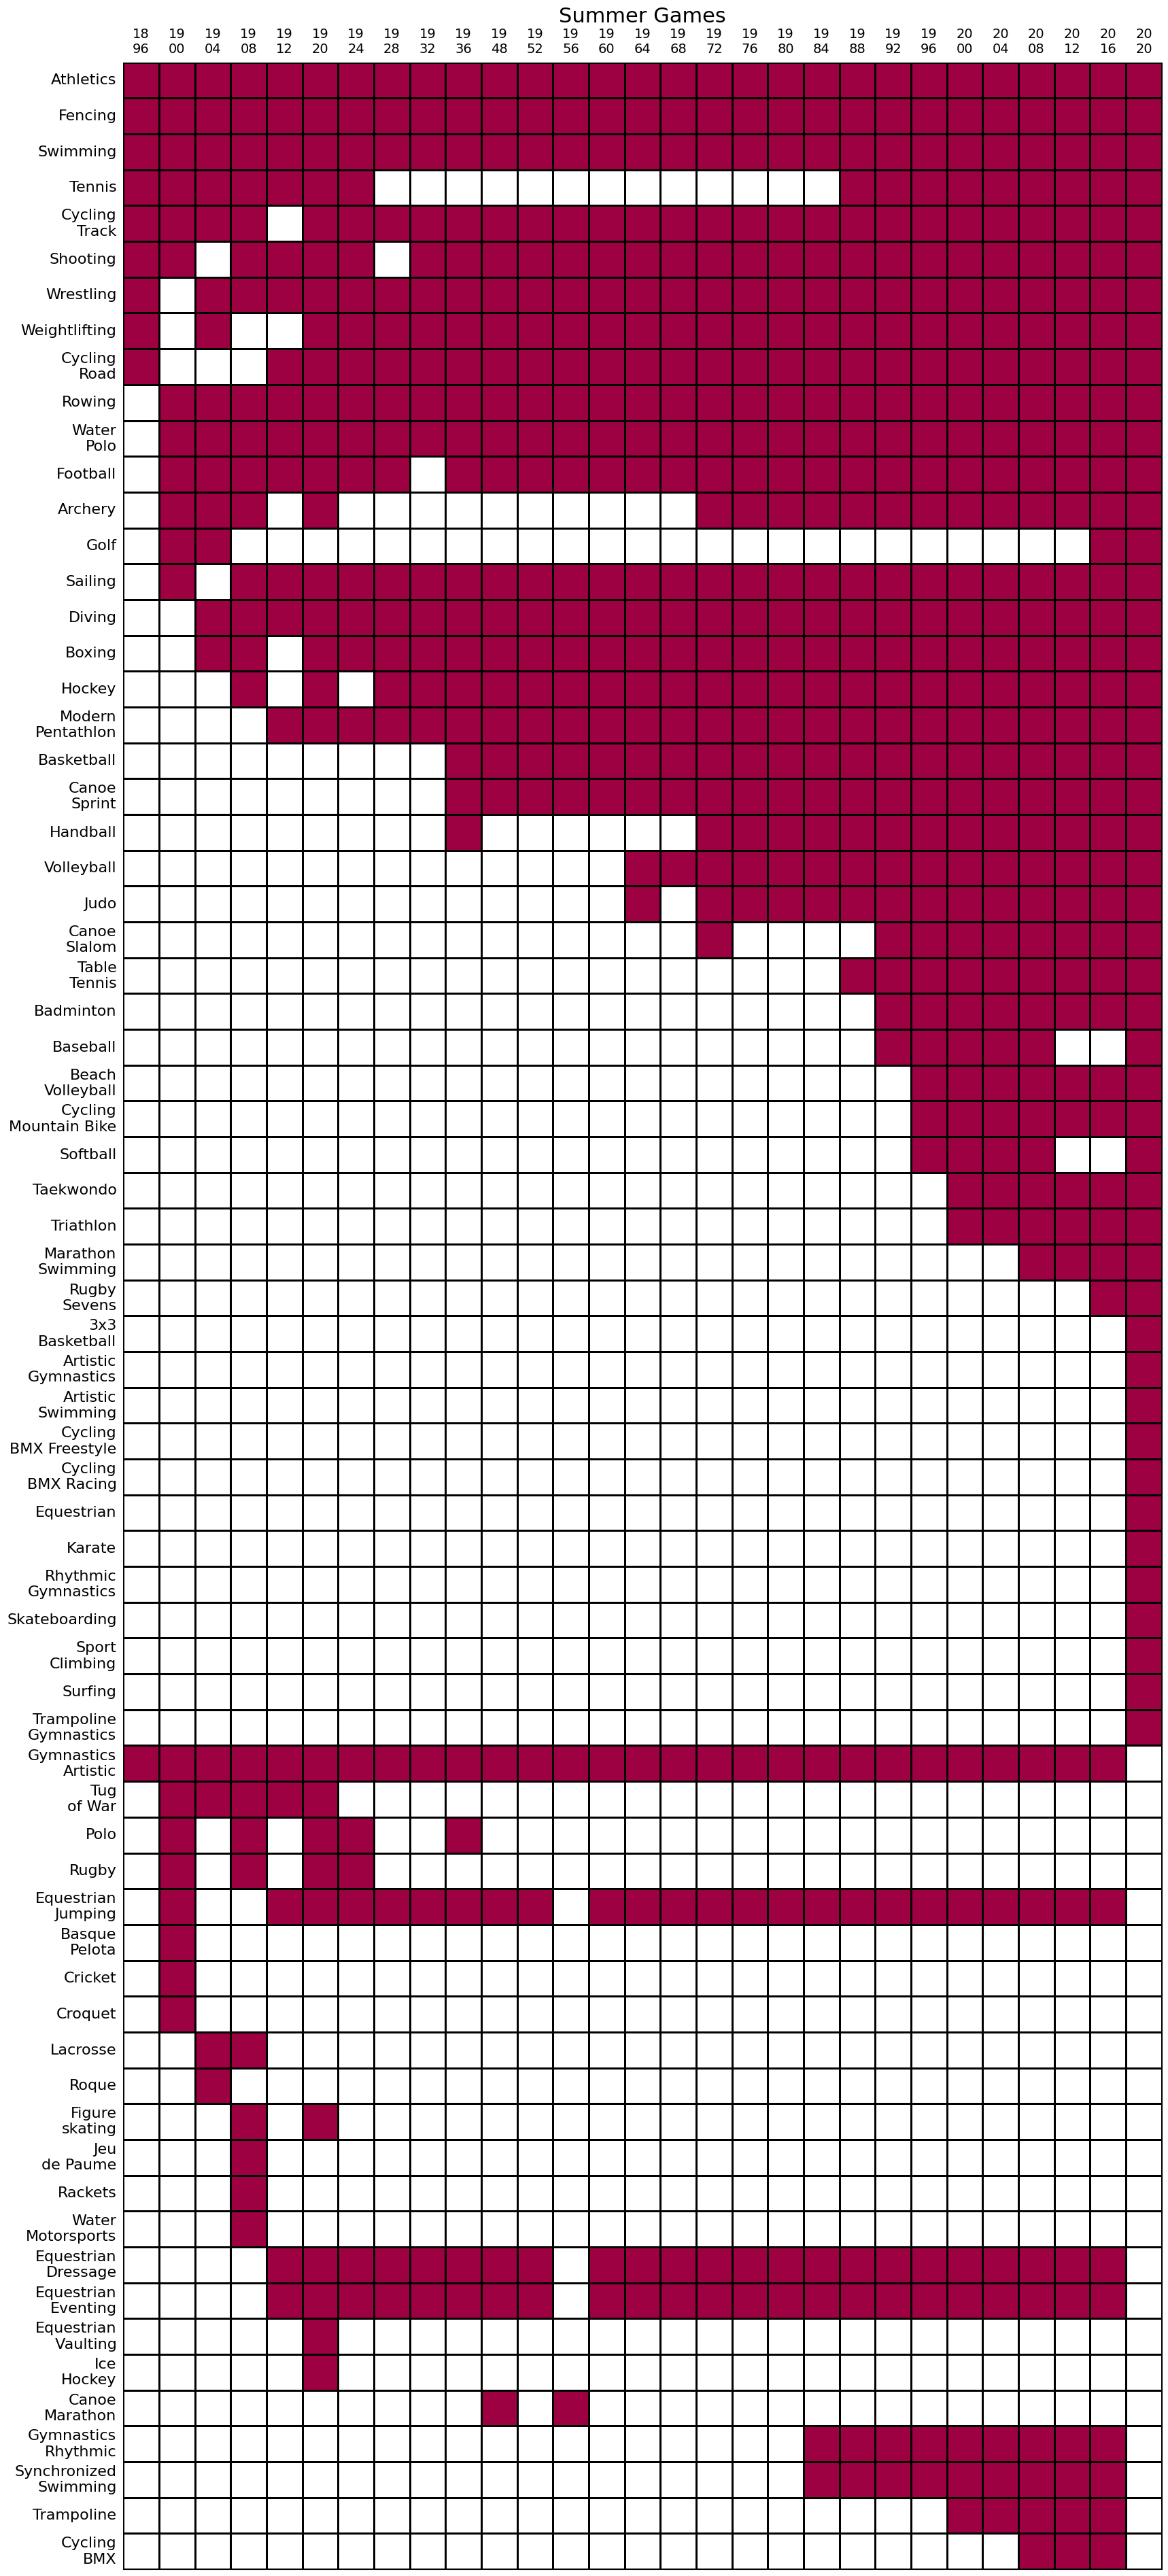

In [40]:
season = 'Summer'
size = (20, 38)
disciplines = get_disciplines_game(data_medal, season)
plot_disciplines(disciplines, title=season, size=size)

## Timeline of disciplines contested at the Winter Summer Olympic Games, 1924-2018

/var/folders/_3/y1q47dsx11165132ykf0nh640000gn/T/ipykernel_41634/1984725332.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heatmap = df_disciplines_year.pivot('discipline_title', 'game_year', 'participant_type')


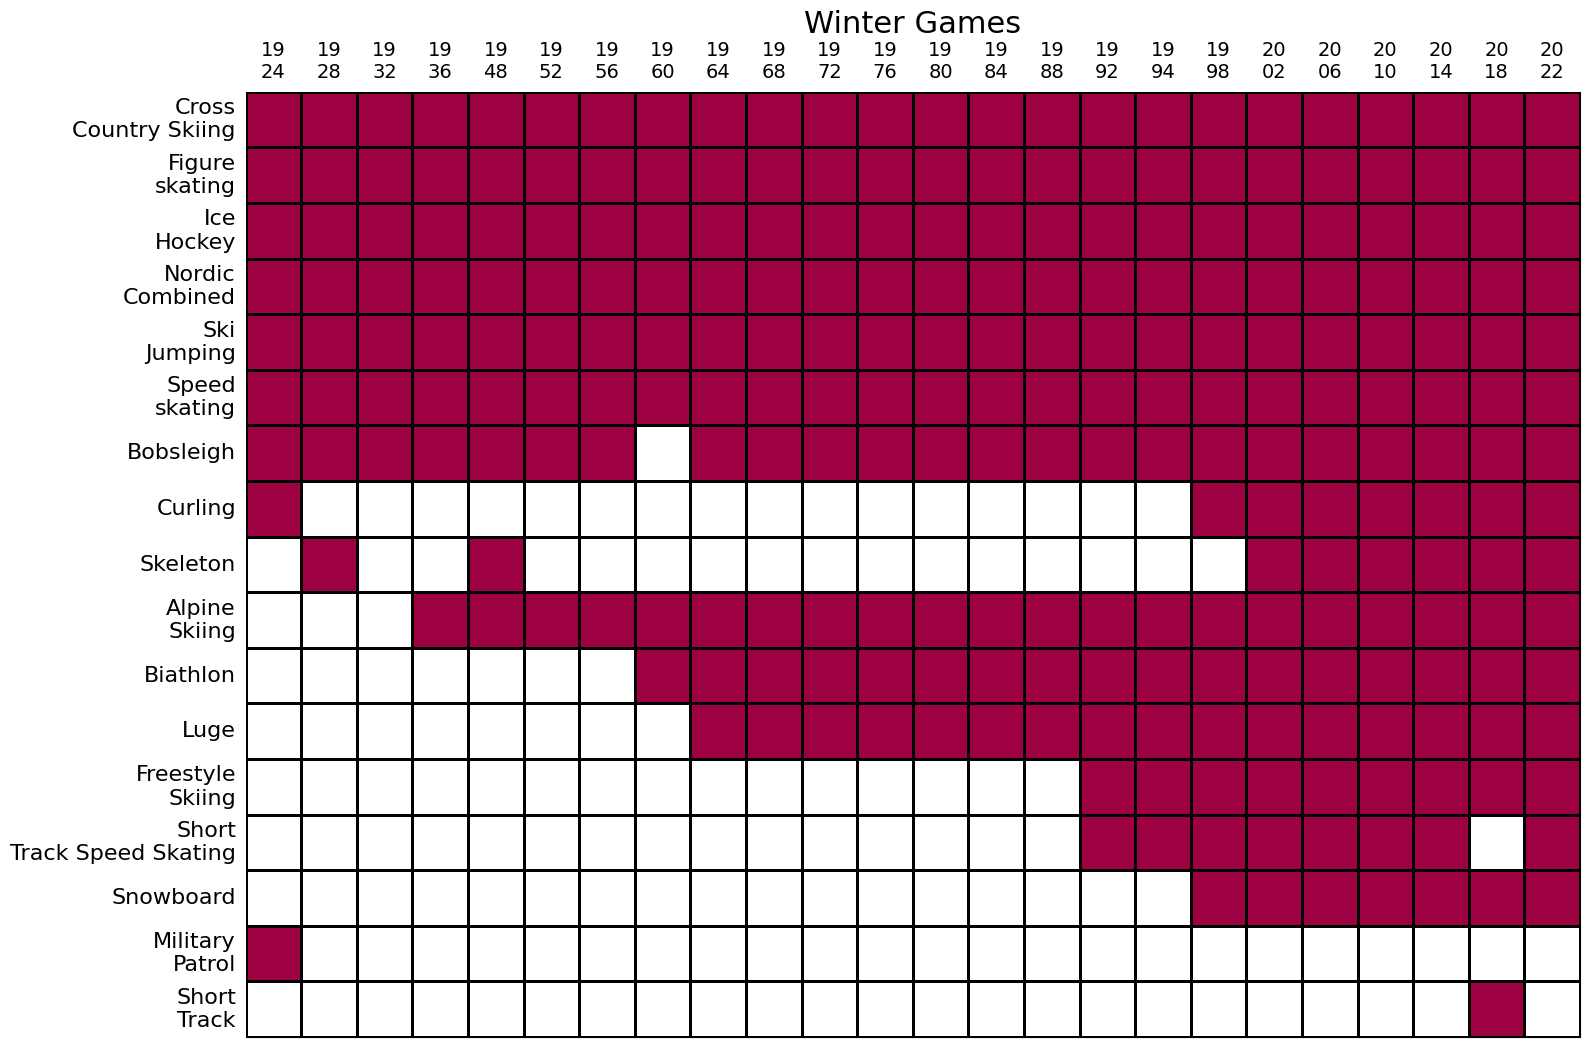

In [41]:
season = 'Winter'
size = (16,12)
disciplines = get_disciplines_game(data_medal, season)
plot_disciplines(disciplines, title=season, size=size)

## Summer Games

In [43]:
data_summer = data_medal[data_medal['game_season']=='Summer'].reset_index(drop=True)
data_summer.drop(['game_season'], axis=1, inplace=True)
data_summer.shape

(16720, 14)

### Medal Distribution by Country

In [44]:
def sort_games_name(game_name_list):
    '''
    Input: ['Sydney 2000', 'Atlanta 1996', 'Beijing 2008', 'Athens 2004']
    Output: ['Atlanta 1996', 'Sydney 2000', 'Athens 2004', 'Beijing 2008'
    '''
    game_name_tuple_split = [(' '.join(i.split(' ')[:-1]), i.split(' ')[-1])  for i in game_name_list]
    game_name_tuple_sorted = sorted(game_name_tuple_split, key=lambda x: x[1])
    game_name_list_sorted = [' '.join(i) for i in game_name_tuple_sorted]
    return game_name_list_sorted

In [45]:
def get_country_medal(data, country):
    data_country = data[data['country_name']==country]
    data_medal = data_country.groupby(['game_name', 'discipline_title'])['participant_type']\
                             .count().reset_index()
    data_medal = data_medal.pivot('discipline_title', 'game_name', 'participant_type')
    data_medal = data_medal[sort_games_name(list(data_medal.columns))]
    if len(list(data_medal.columns))<10:
        data_medal.columns = [col.replace(' ', '\n') for col in data_medal.columns]
    else:
        data_medal.columns = [col.split(' ')[-1] for col in data_medal.columns]
    data_medal['Total'] = data_medal.sum(axis=1)
    data_medal.loc["Total"] = data_medal.sum()
    return data_medal

In [46]:
def plot_country_medal(data, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    ax = sns.heatmap(data, annot=True, annot_kws={"fontsize":16},
                     cbar=False, linewidths=.8, fmt='g', cmap='coolwarm')
#     ax.set_title('Team', size=20)
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=16)
    ax.xaxis.tick_top()
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.tight_layout()
#     plt.savefig('medals.png', dpi=300)
    plt.show()

### Top 10 performers

In [47]:
country_medal = data_summer.groupby(['country_name'])['participant_type'].count()\
                           .reset_index().rename(columns={'participant_type':'total_number'})
country_medal.sort_values('total_number', ascending=False)[:10]

,country_name,total_number
134,USA,2627
46,Germany,1373
118,Soviet Union,1010
48,Great Britain,913
43,France,744
23,China,634
64,Italy,615
5,Australia,547
55,Hungary,509
66,Japan,497


### Medals Heat Map: USA (Top 1 performer)

/var/folders/_3/y1q47dsx11165132ykf0nh640000gn/T/ipykernel_41634/2752877837.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_medal = data_medal.pivot('discipline_title', 'game_name', 'participant_type')


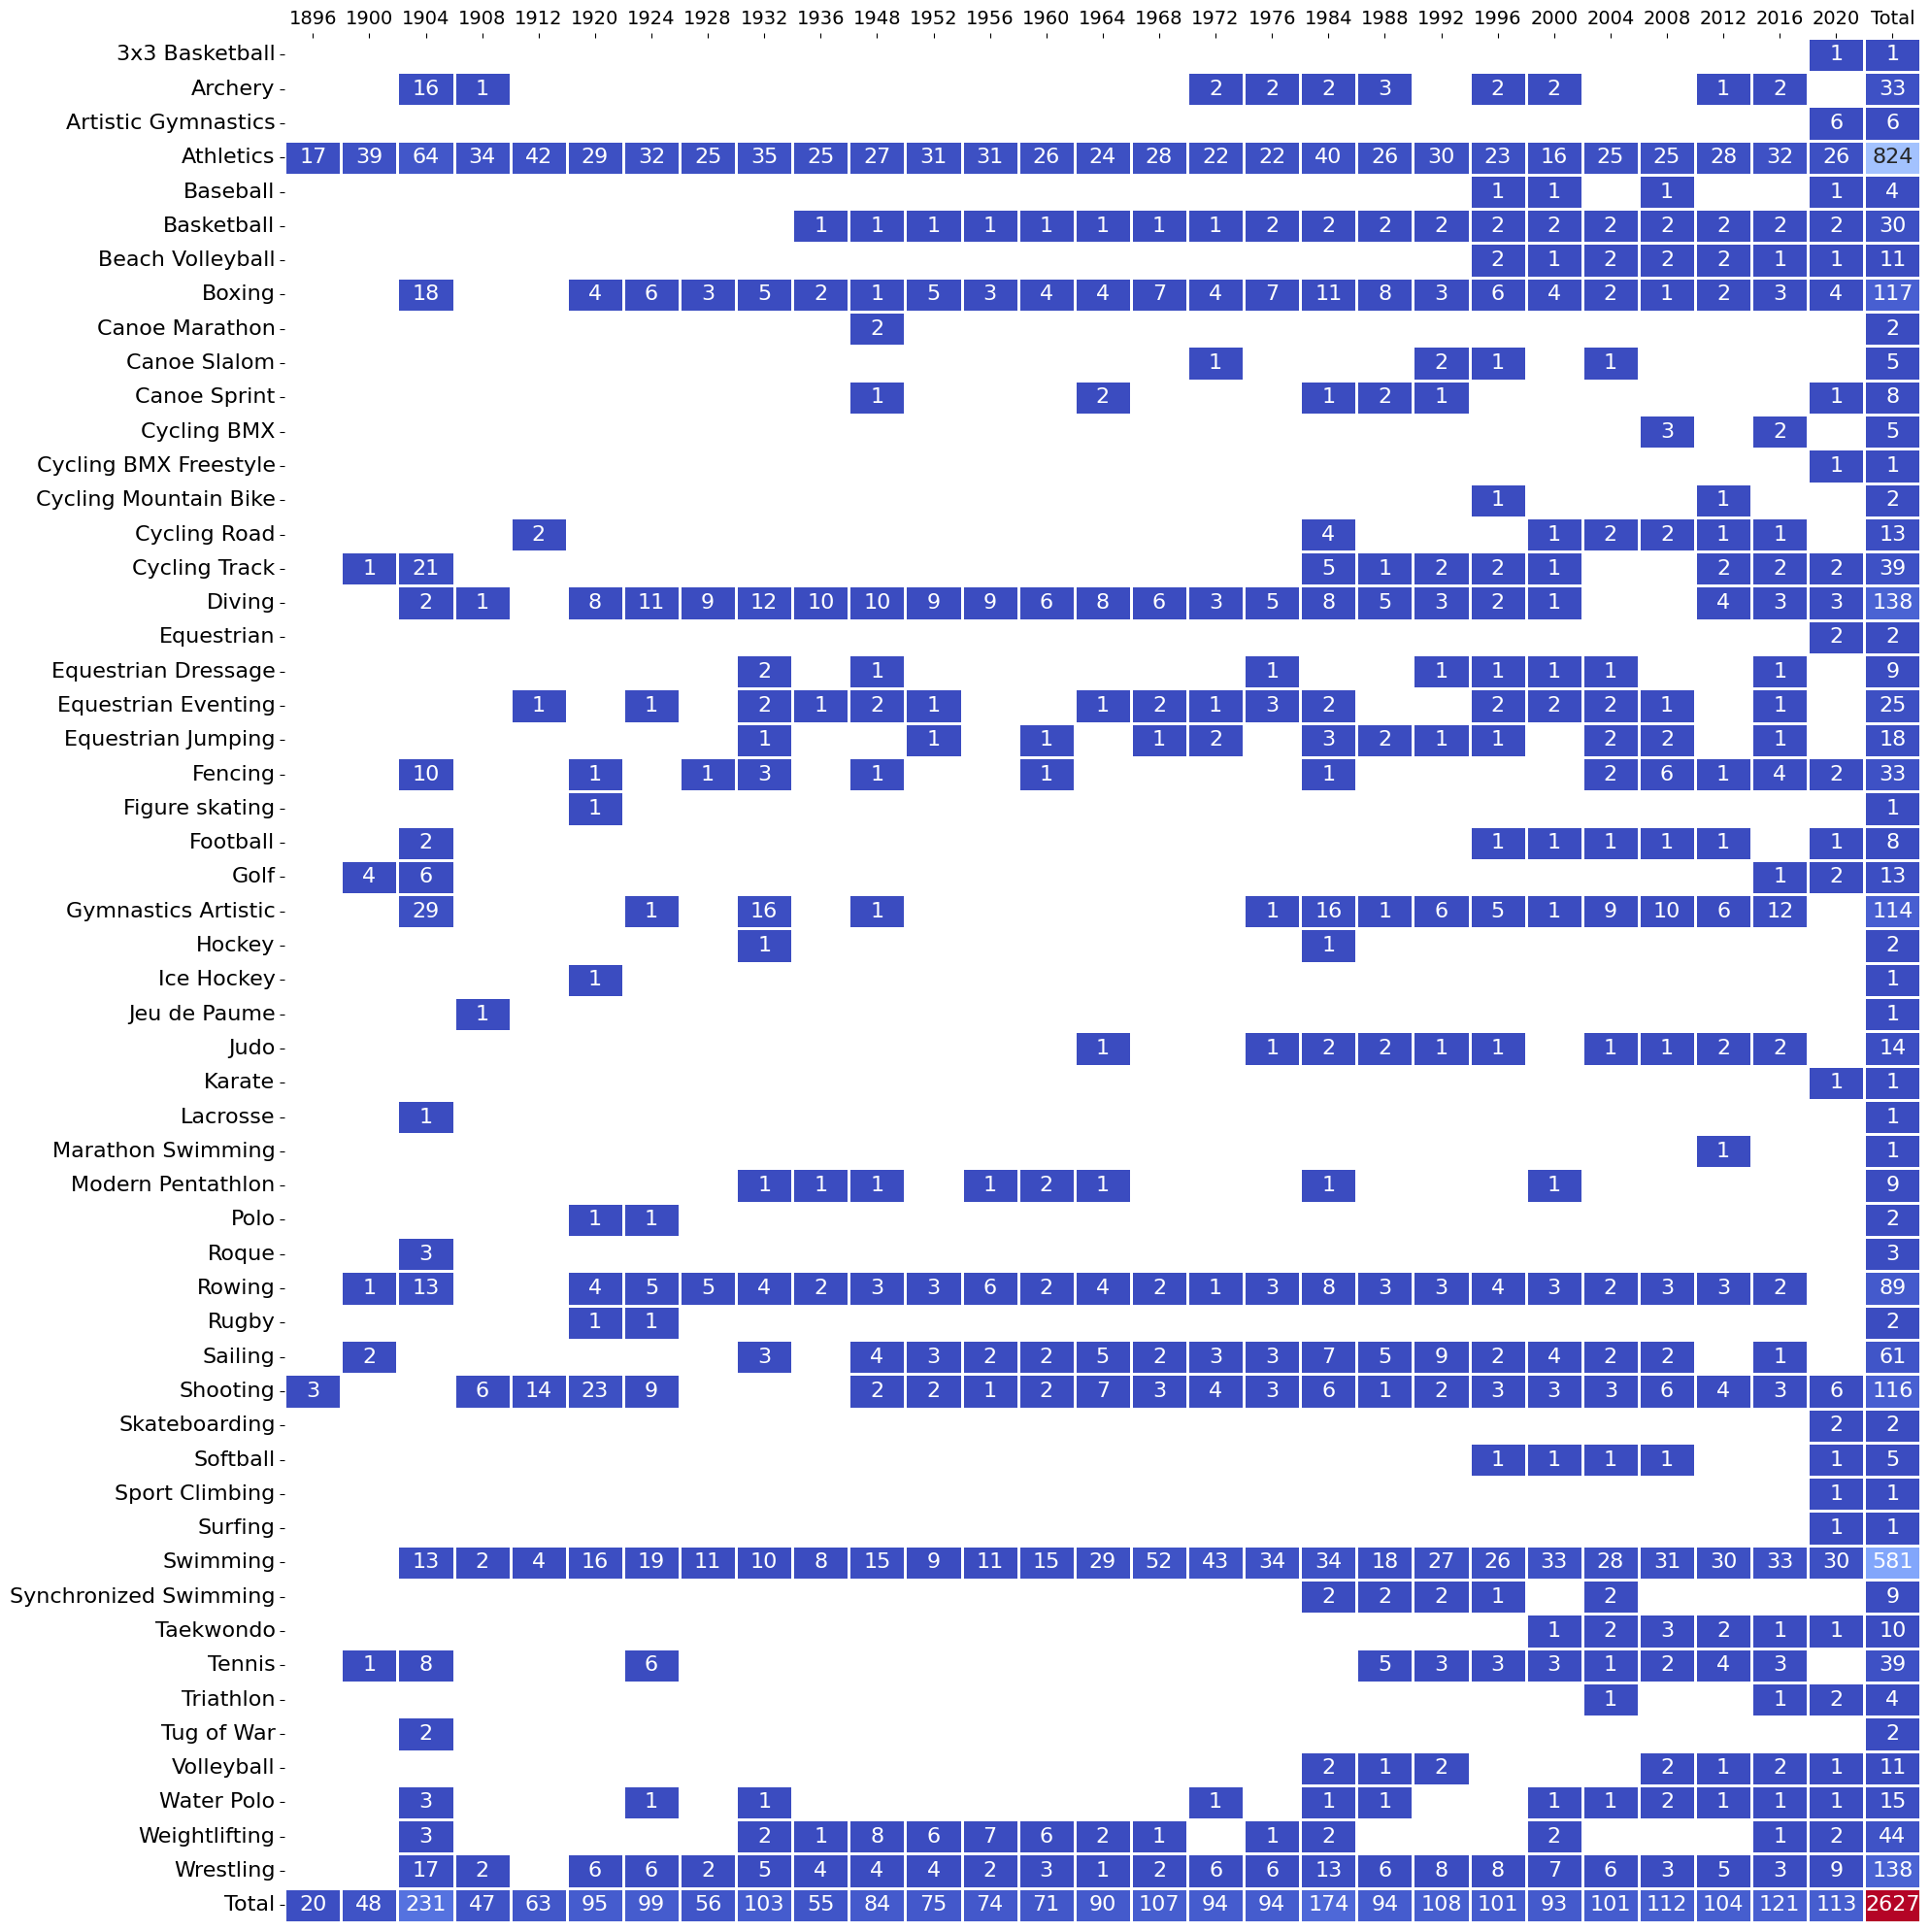

In [48]:
country_medal_usa = get_country_medal(data_summer, 'USA')
plot_country_medal(country_medal_usa)

### Medals Heat Map: Ukraine

/var/folders/_3/y1q47dsx11165132ykf0nh640000gn/T/ipykernel_41634/2752877837.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_medal = data_medal.pivot('discipline_title', 'game_name', 'participant_type')


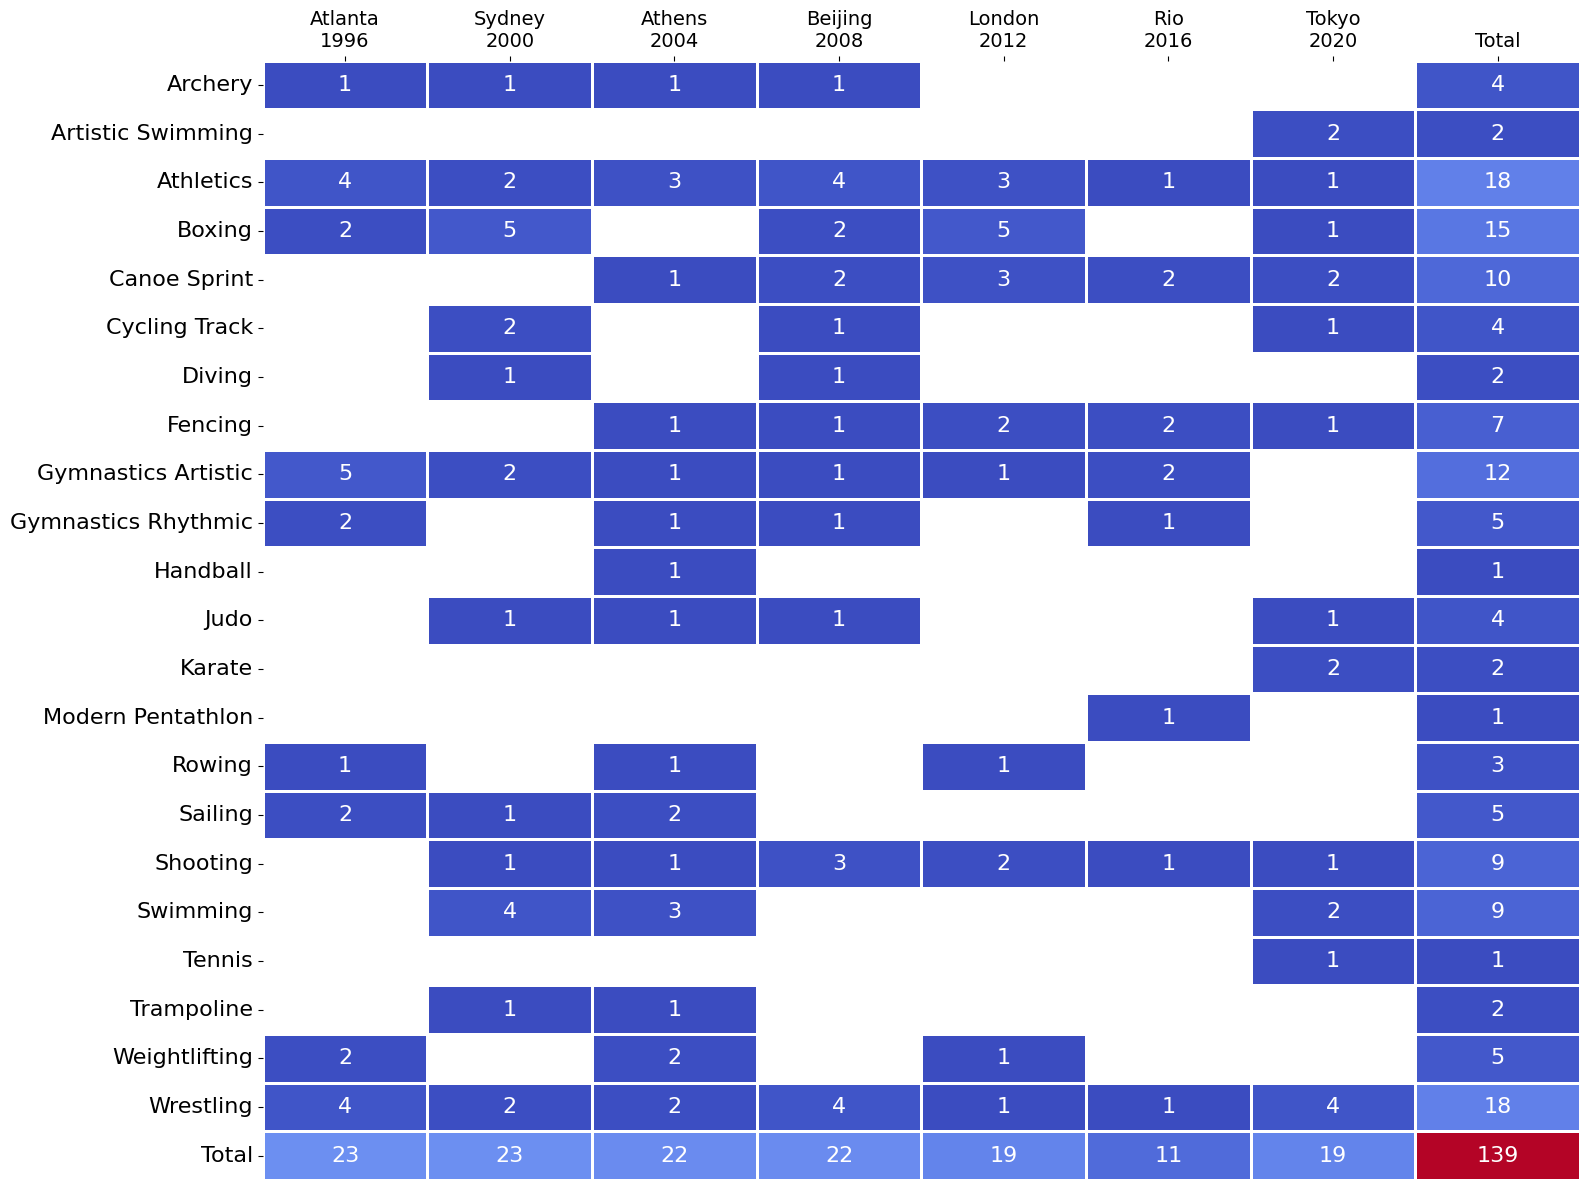

In [49]:
country_medal_ua = get_country_medal(data_summer, 'Ukraine')
plot_country_medal(country_medal_ua, figsize=(16,12))

## Winter Games

In [50]:
data_winter = data_medal[data_medal['game_season']=='Winter'].reset_index(drop=True)
data_winter.drop(['game_season'], axis=1, inplace=True)
data_winter.shape

(3497, 14)

In [52]:
data_winter

,discipline_title,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_location,game_name,game_year
0,Curling,Women,Women,GOLD,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,2022
1,Curling,Women,Women,SILVER,GameTeam,Japan,NaN,NaN,Japan,JP,JPN,China,Beijing 2022,2022
2,Curling,Women,Women,BRONZE,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,2022
3,Curling,Men,Men,GOLD,GameTeam,Sweden,NaN,NaN,Sweden,SE,SWE,China,Beijing 2022,2022
4,Curling,Men,Men,SILVER,GameTeam,Great Britain,NaN,NaN,Great Britain,GB,GBR,China,Beijing 2022,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,Figure skating,Individual women,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/beatrix-loughran,Beatrix Loughran,USA,US,USA,France,Chamonix 1924,1924
3493,Figure skating,Individual women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/ethel-muckelt,Ethel Muckelt,Great Britain,GB,GBR,France,Chamonix 1924,1924
3494,Figure skating,Individual men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/gillis-grafstrom,Gillis Grafström,Sweden,SE,SWE,France,Chamonix 1924,1924
3495,Figure skating,Individual men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/willy-bockl,Willy Böckl,Austria,AT,AUT,France,Chamonix 1924,1924


### Top 10 performers

In [53]:
country_medal_winter = data_winter.groupby(['country_name'])['participant_type'].count()\
                           .reset_index().rename(columns={'participant_type':'total_number'})
country_medal_winter.sort_values('total_number', ascending=False)[:10]

,country_name,total_number
14,Germany,435
26,Norway,405
39,USA,330
1,Austria,250
5,Canada,225
35,Soviet Union,194
37,Sweden,176
12,Finland,175
38,Switzerland,167
23,Netherlands,147


### Medals Heat Map: Norway (Top 2 performer)

/var/folders/_3/y1q47dsx11165132ykf0nh640000gn/T/ipykernel_41634/2752877837.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_medal = data_medal.pivot('discipline_title', 'game_name', 'participant_type')


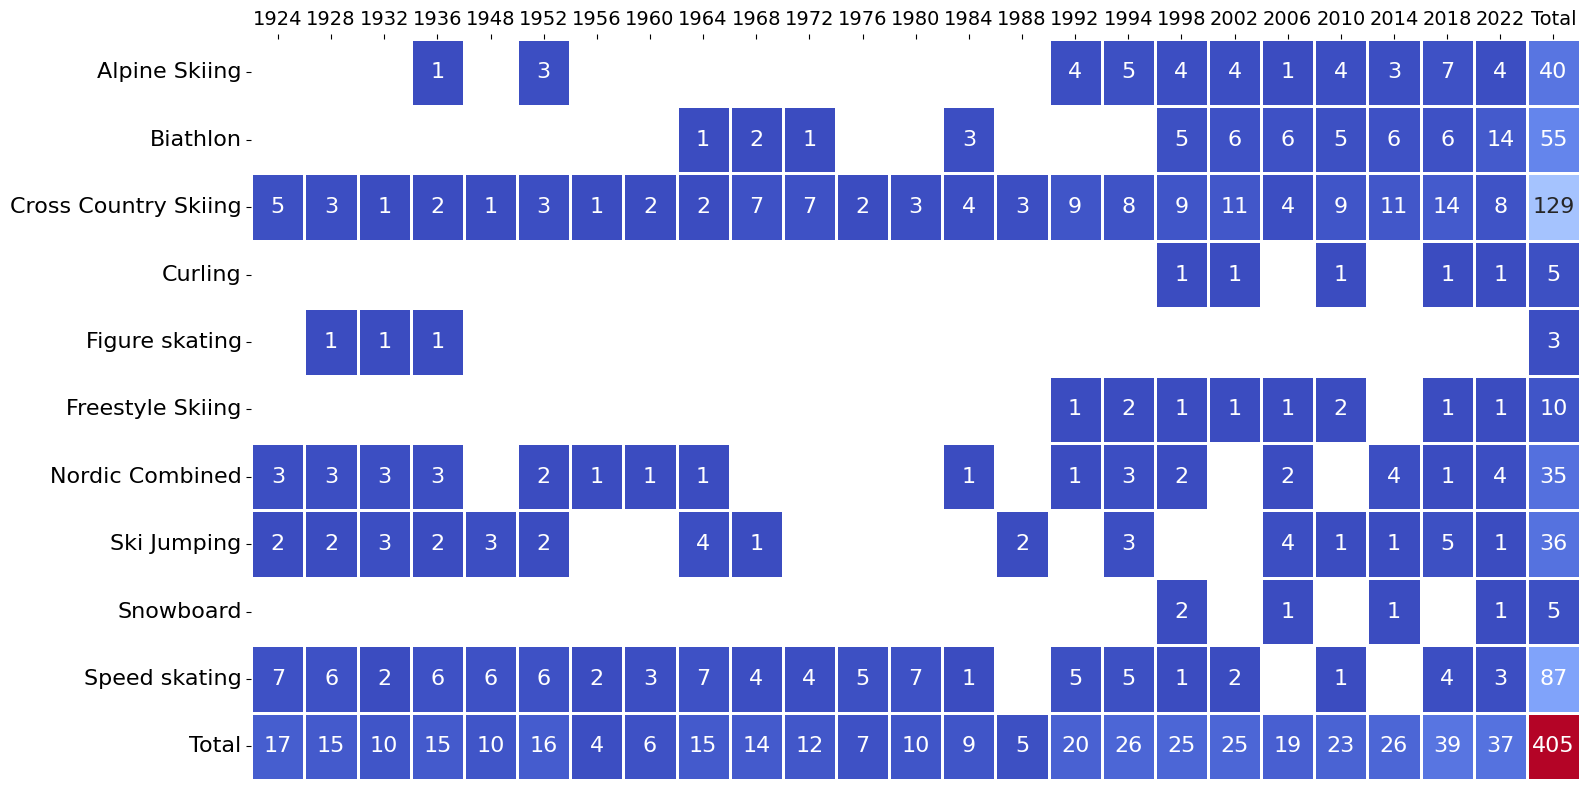

In [54]:
country_medal_nor = get_country_medal(data_winter, 'Norway')
plot_country_medal(country_medal_nor, figsize=(16,8))

## Disciplines: Tennis

In [56]:
data_tennis = data_summer[data_summer['discipline_title']=='Tennis']
data_tennis.shape

(228, 14)

In [57]:
data_tennis_women = data_tennis[(data_tennis['event_gender']=='Women')&
                                (data_tennis['participant_type']=='Athlete')&
                                (data_tennis['game_year']>=1988)]

data_tennis_men = data_tennis[(data_tennis['event_gender']=='Men')&
                              (data_tennis['participant_type']=='Athlete')&
                              (data_tennis['game_year']>=1988)]

In [58]:
data_tennis_women.groupby(['game_name', 'medal_type'])['country_name'].apply(list).reset_index()\
                 .pivot('game_name', 'medal_type', 'country_name')

/var/folders/_3/y1q47dsx11165132ykf0nh640000gn/T/ipykernel_41634/2533127910.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_tennis_women.groupby(['game_name', 'medal_type'])['country_name'].apply(list).reset_index()\


medal_type,BRONZE,GOLD,SILVER
game_name,,,
Athens 2004,[Australia],[Belgium],[France]
Atlanta 1996,[Czech Republic],[USA],[Spain]
Barcelona 1992,"[Spain, USA]",[USA],[Germany]
Beijing 2008,[Russian Federation],[Russian Federation],[Russian Federation]
London 2012,[Belarus],[USA],[Russian Federation]
Rio 2016,[Czech Republic],[Puerto Rico],[Germany]
Seoul 1988,"[USA, Bulgaria]",[Germany],[Argentina]
Sydney 2000,[USA],[USA],[Russian Federation]
Tokyo 2020,[Ukraine],[Switzerland],[Czech Republic]


In [59]:
data_tennis_men.groupby(['game_name', 'medal_type'])['country_name'].apply(list).reset_index()\
                 .pivot('game_name', 'medal_type', 'country_name')

/var/folders/_3/y1q47dsx11165132ykf0nh640000gn/T/ipykernel_41634/1313307693.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_tennis_men.groupby(['game_name', 'medal_type'])['country_name'].apply(list).reset_index()\


medal_type,BRONZE,GOLD,SILVER
game_name,,,
Athens 2004,[Chile],[Chile],[USA]
Atlanta 1996,[India],[USA],[Spain]
Barcelona 1992,"[Croatia, Unified Team]",[Switzerland],[Spain]
Beijing 2008,[Serbia],[Spain],[Chile]
London 2012,[Argentina],[Great Britain],[Switzerland]
Rio 2016,[Japan],[Great Britain],[Argentina]
Seoul 1988,"[Sweden, USA]",[Czechoslovakia],[USA]
Sydney 2000,[France],[Russian Federation],[Germany]
Tokyo 2020,[Spain],[Germany],[ROC]


## To be continued ...